<a href="https://colab.research.google.com/github/saisuryakeshetty/creditcard_fraud_detection/blob/main/creditcard_fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from statsmodels.api import qqplot
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,fbeta_score,make_scorer

# Get the Data

In [ ]:
# Load dataset
df = pd.read_csv('/content/drive/MyDrive/creditcard.csv')

In [ ]:
# display the df(first 5 rows)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Exploratory Data Analysis

In [ ]:
# get basic info like Dtype and null values(missing values) for features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

There are no missing values

In [ ]:
# description of data
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


<Axes: xlabel='Class', ylabel='count'>

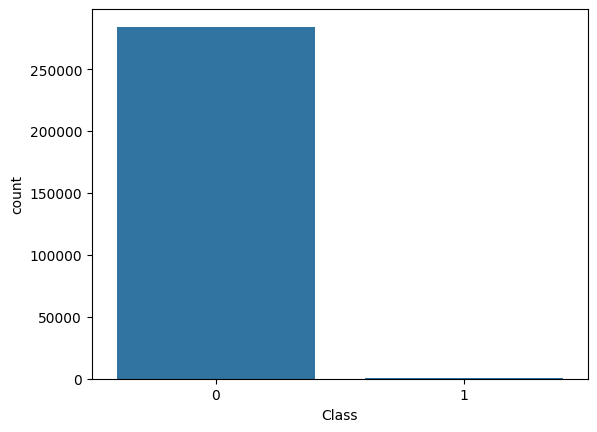

In [ ]:
# compare number of genuine and fraud transactions
sns.countplot(x='Class',data=df)

In [ ]:
# get percentage of genuine and fraud transactions
print('Genuine', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Fraud', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

Genuine 99.83 % of the dataset
Fraud 0.17 % of the dataset


Dataset is highly imbalanced.

In [17]:
# seperating features and labels
X = df.drop(['Class'],axis=1)
y = df['Class']

<Axes: >

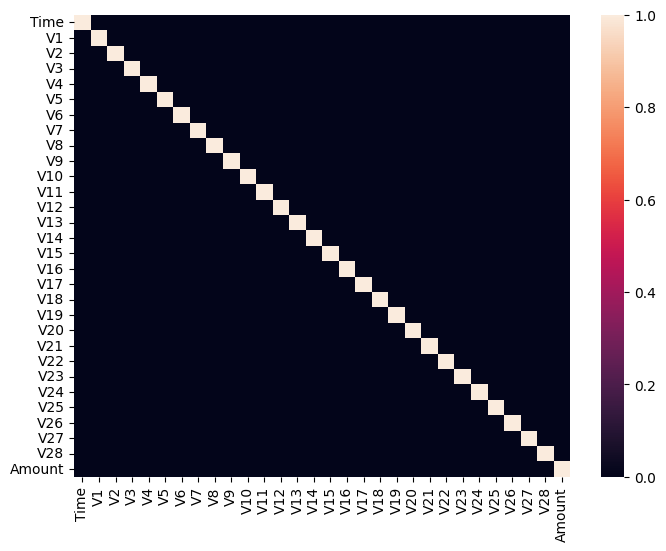

In [35]:
# checking for high correlation between features, in this heatmap 1 represent magnitude of correlation coefficient greater than 0.8
plt.figure(figsize=(8,6))
sns.heatmap((X.corr()>0.8) | (X.corr()<-0.8))

No two features have high correlation. It is expected as V1,V2,..V28 are principal components.

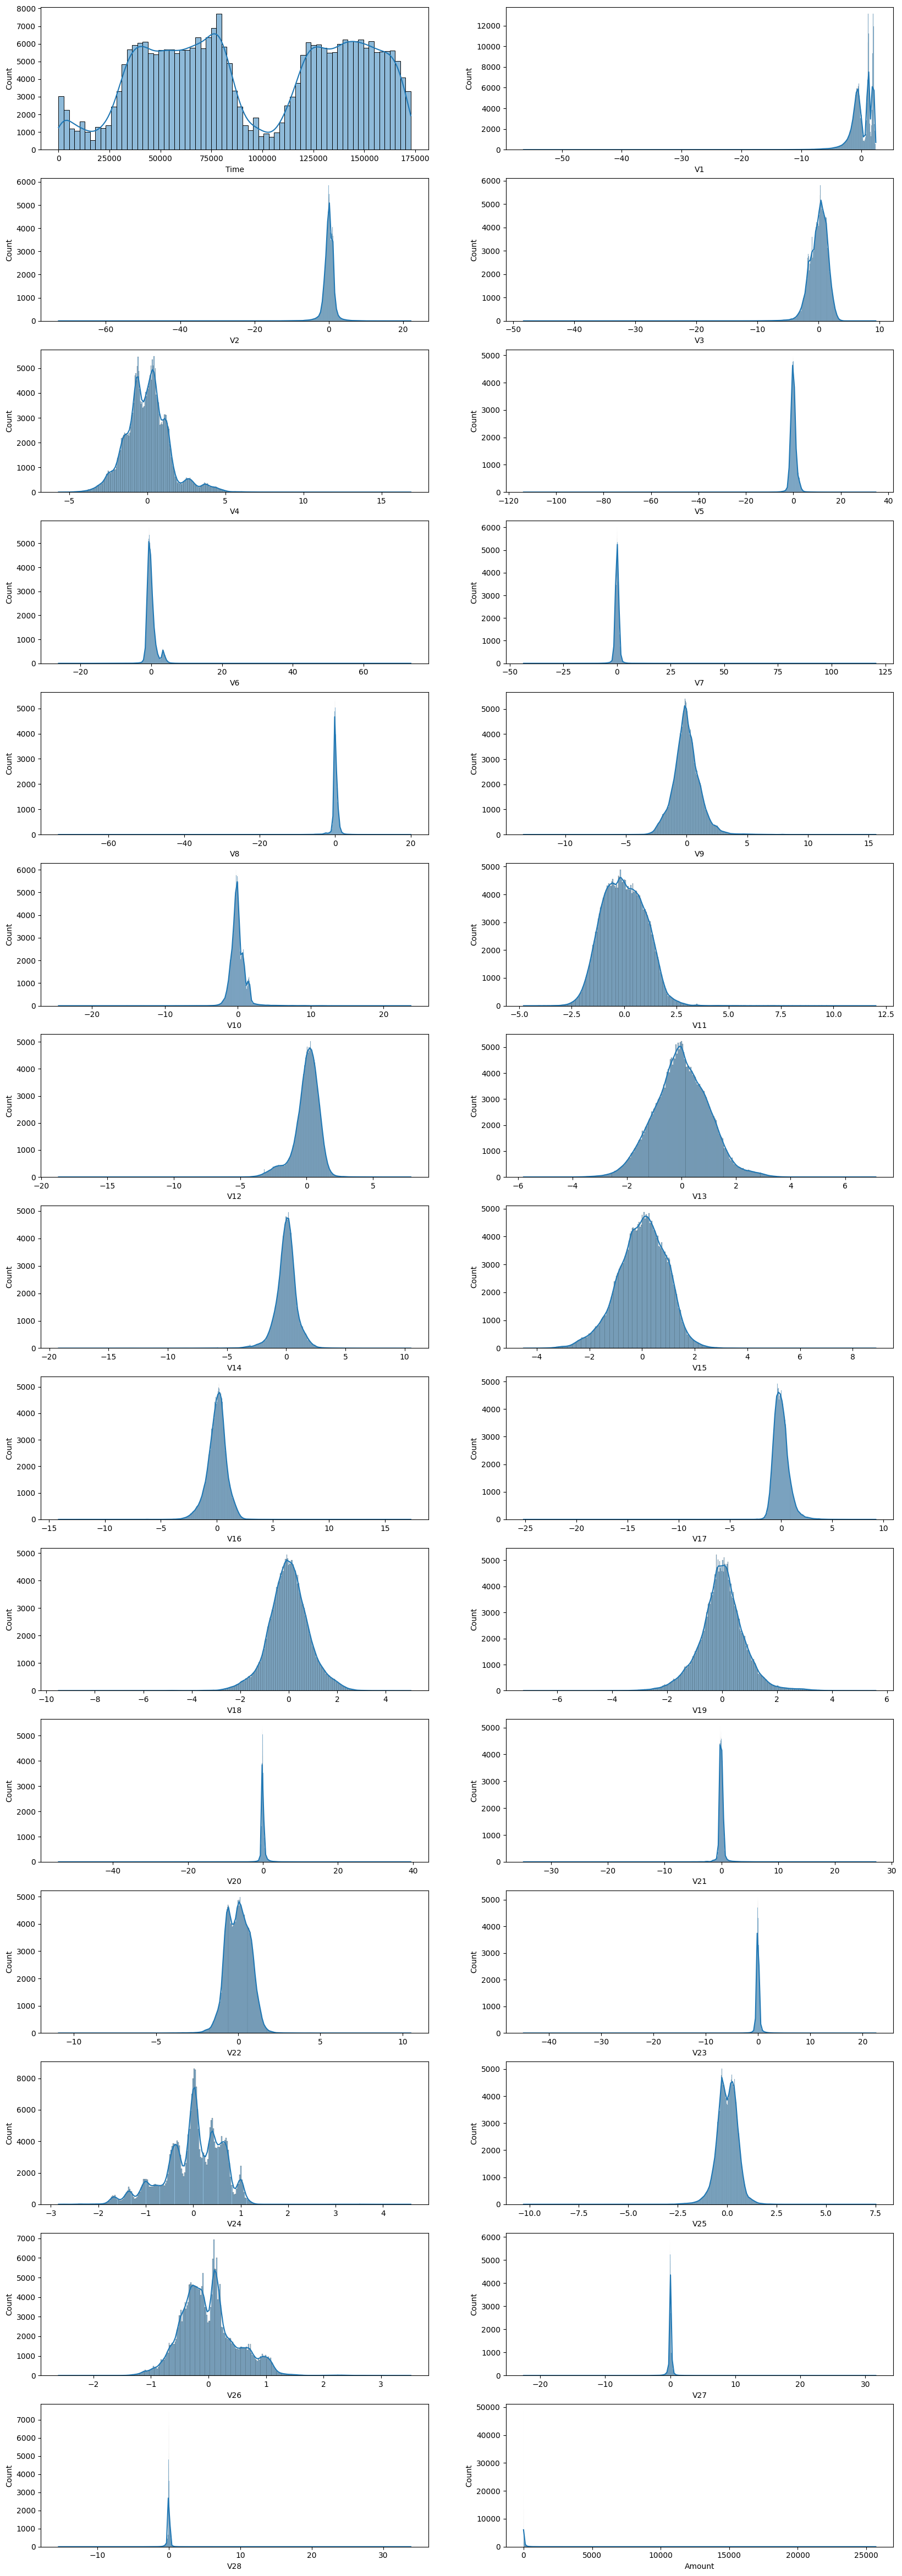

In [37]:
# get distribution of features
fig,axes = plt.subplots(15,2,figsize = (20,60))
axes = axes.flatten()
cols = X.columns
for ax,col in zip(axes,cols):
    sns.histplot(X[col],ax=ax,kde=True)

Features V1,V2...V28 have similar orders of magnitude. Amount,Time require scaling.

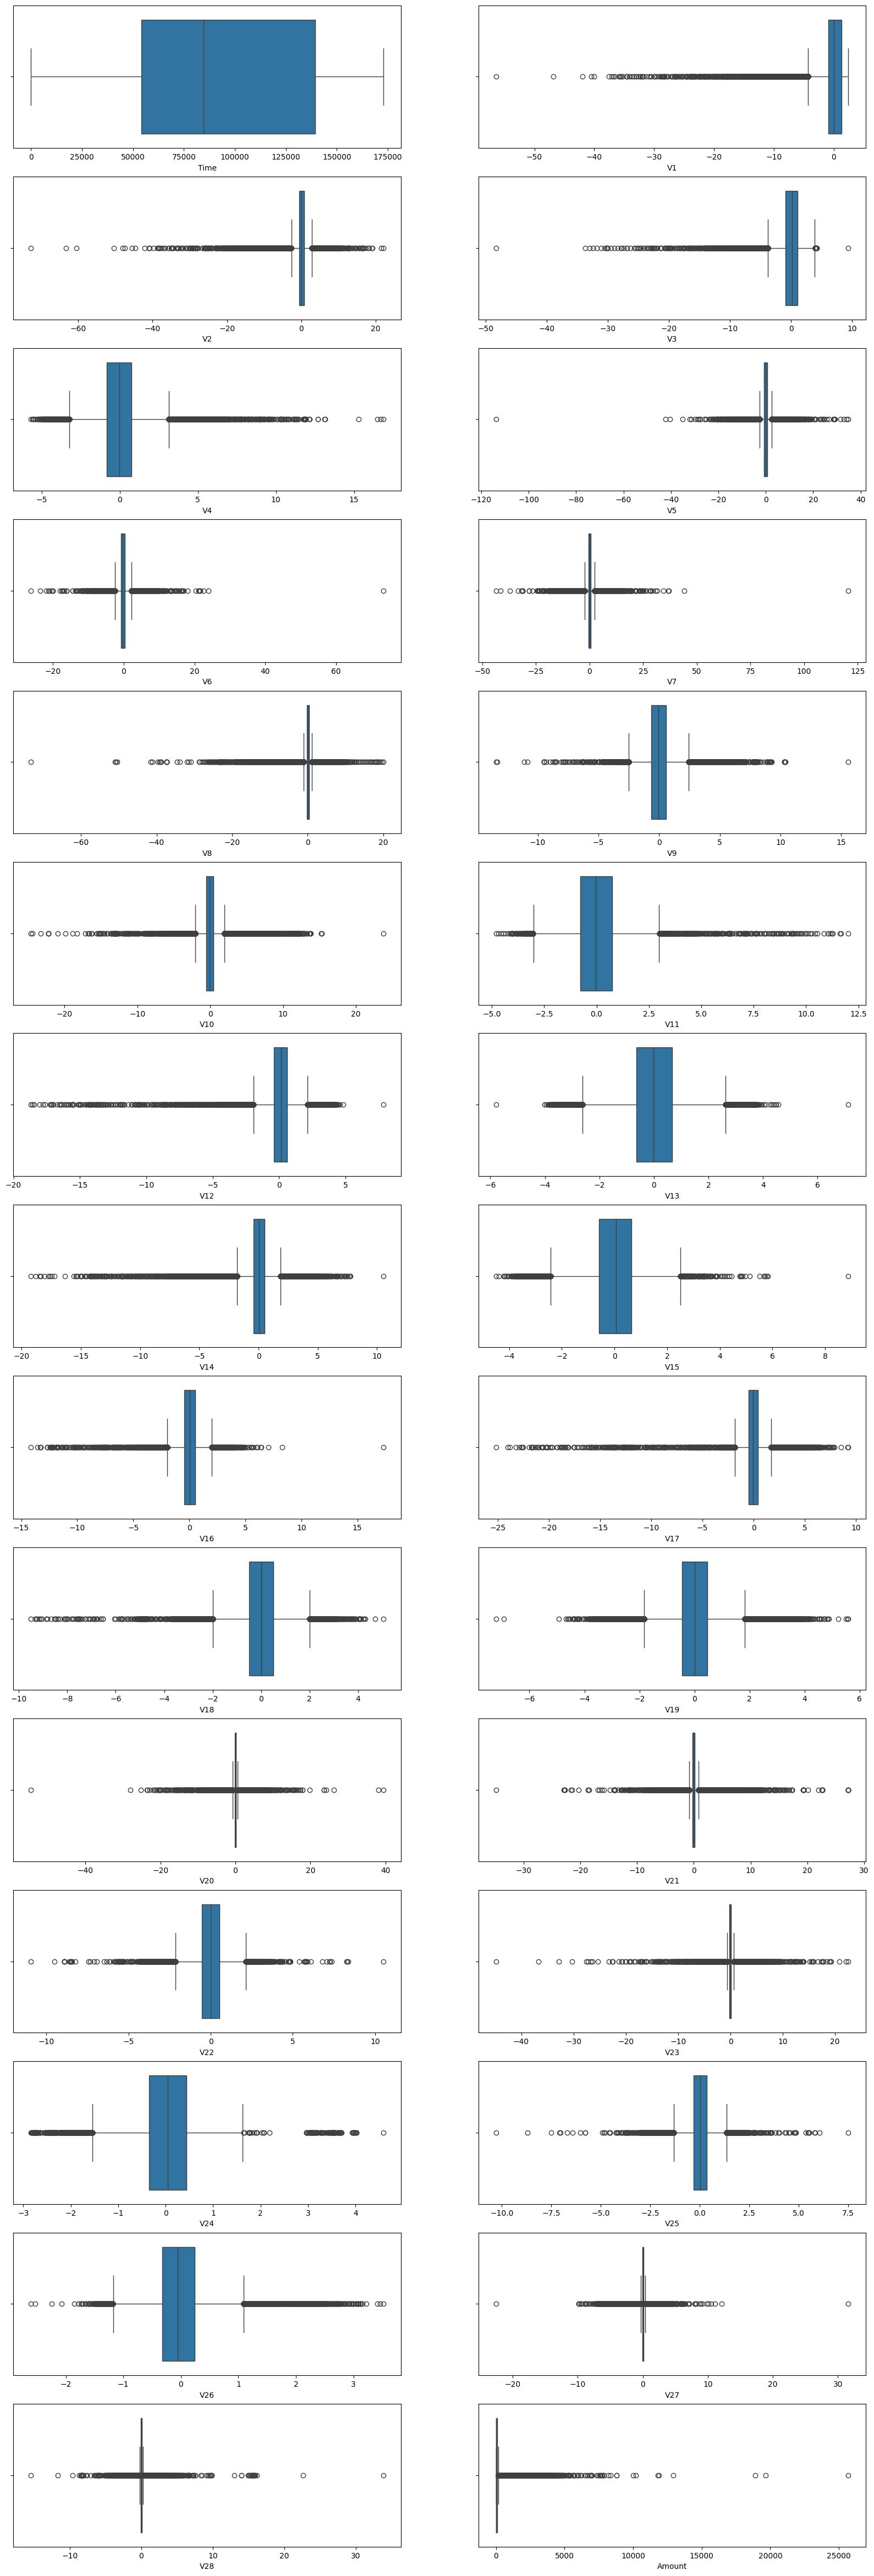

In [40]:
# get boxplot for each feature
fig,axes = plt.subplots(15,2,figsize = (20,60))
axes = axes.flatten()
cols = X.columns
for ax,col in zip(axes,cols):
    sns.boxplot(x=col,data=X,ax=ax)

Looks like many features have outliers. We can try removing them for better results.

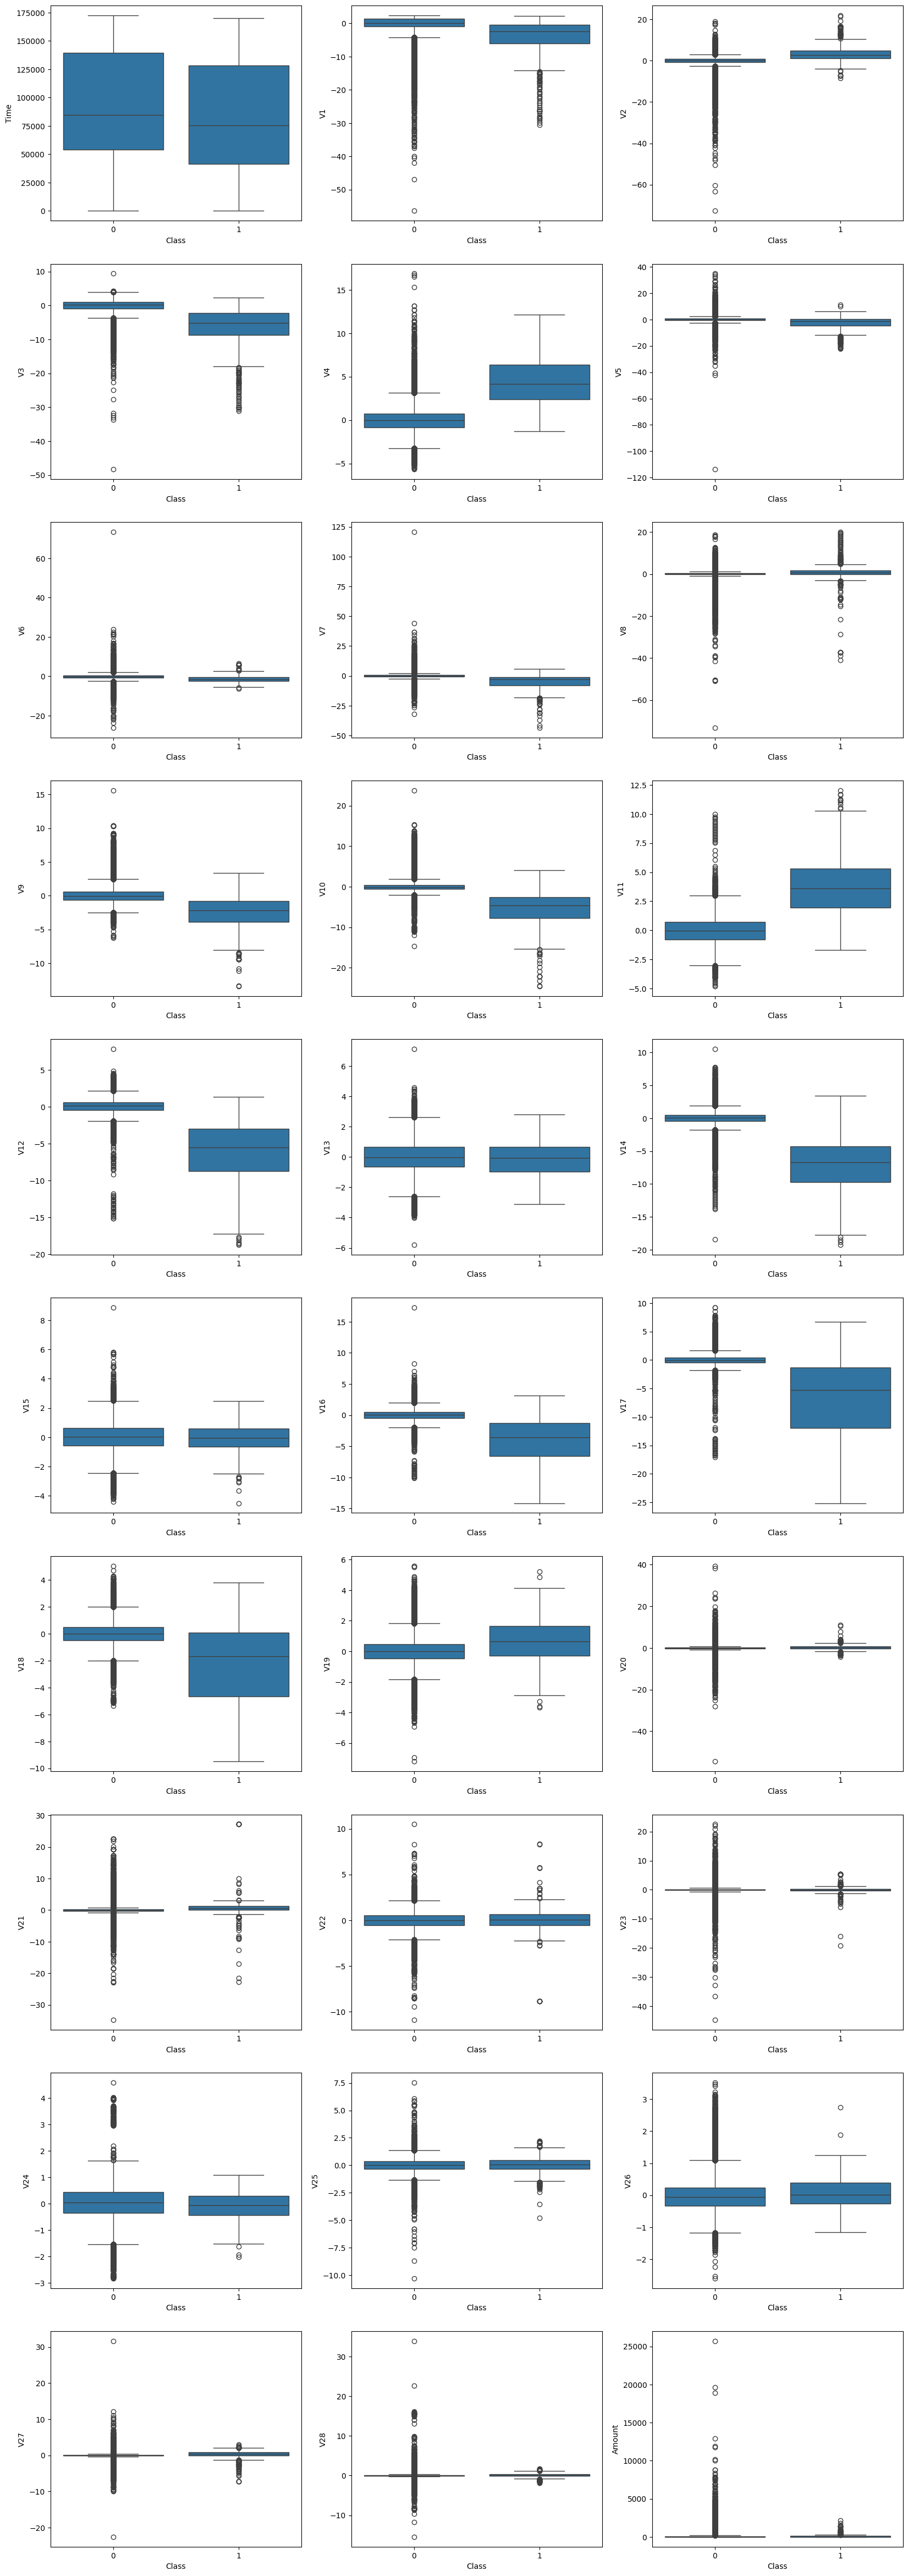

In [41]:
# For each feature, compare boxplots of different classes
fig,axes = plt.subplots(10,3,figsize = (20,60))
axes = axes.flatten()
cols = df.columns[:-1]
for ax,col in zip(axes,cols):
    sns.boxplot(x='Class',y=col,data=df,ax=ax)

# Train Test Split

Setting 'stratify' = y, keeps distribution of labels same in training, testing set

In [42]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2, random_state=1, stratify=y)

# Approach

1). **Oversampling with SMOTE:** Our orginal dataset is highly imbalanced. 99.83% of transactions are genuine. If we use this dataframe to train our model we might get a lot of errors and our model will probably overfit since it will assume that most transactions are genuine. We will use SMOTE to overcome this problem. SMOTE(Synthetic Minority Oversampling Technique) is an oversampling technique where synthetic samples are generated for minority class. In simple words, this technique selects a random example from minority class and selects a random neighbor using K Nearest Neighbors. The synthetic example is created between two examples in the feature space.

2). **Scaling with RobustScaler:** Orders of magnitude of Amount,Time are different from V1,V2...V28. We will use RobustScaler for Amount,Time. Advantage of RobustScaler is feature values are less influenced by outliers(because it uses median,IQR).

3). **Oversampling during cross validating:** If we use SMOTE on whole training set and then if we use that new training set for cross validition in hyperparameter tuning, then validation sets will have some synthetic data created from training set causing "data leakage" problem. We will use GridSearchCV containing SMOTE with orginal training set, so that validation datasets won't have synthetic data.

4). **Using F2 Score in GridSearchCV:** Validation sets while using GridSearchCV will be highly imbalanced in our case. Using accuracy is not a good choice. We want higher recall for our predictions, because prediciting a fraud as genuine transaction(False Negative) is more dangerous than prediciting a genuine as fraud transaction(False Positive). We will use F2 Score as it gives more importance to recall.  

# Logistic Regression

In [ ]:
pipeline= Pipeline([
    ('SMOTE',SMOTE()),
    ('CT',ColumnTransformer([('Robust_Scaler', RobustScaler(), ['Time','Amount'])],remainder='passthrough')),
    ('classifier', LogisticRegression(max_iter=1000))])

In [ ]:
param_grid = {'classifier__C': [0.01,0.1,1,10,100]}

In [ ]:
gscv_LR = GridSearchCV(pipeline,
                       param_grid,
                       scoring=make_scorer(fbeta_score,beta=2),
                       cv = StratifiedKFold(n_splits=3,shuffle=True,random_state=1),
                       verbose=2)

In [ ]:
gscv_LR.fit(X_train,y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] END .................................classifier__C=0.01; total time=   3.6s
[CV] END .................................classifier__C=0.01; total time=   5.9s
[CV] END .................................classifier__C=0.01; total time=   3.7s
[CV] END ..................................classifier__C=0.1; total time=   4.1s
[CV] END ..................................classifier__C=0.1; total time=   8.5s
[CV] END ..................................classifier__C=0.1; total time=   4.9s
[CV] END ....................................classifier__C=1; total time=   4.2s
[CV] END ....................................classifier__C=1; total time=  11.2s
[CV] END ....................................classifier__C=1; total time=   4.6s
[CV] END ...................................classifier__C=10; total time=   5.7s
[CV] END ...................................classifier__C=10; total time=  10.6s
[CV] END ...................................class

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=1, shuffle=True),
             estimator=Pipeline(steps=[('SMOTE', SMOTE()),
                                       ('CT',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('Robust_Scaler',
                                                                         RobustScaler(),
                                                                         ['Time',
                                                                          'Amount'])])),
                                       ('classifier',
                                        LogisticRegression(max_iter=1000))]),
             param_grid={'classifier__C': [0.01, 0.1, 1, 10, 100]},
             scoring=make_scorer(fbeta_score, beta=2), verbose=2)

In [ ]:
gscv_LR.best_params_

{'classifier__C': 100}

In [ ]:
gscv_LR.best_score_

0.4488804666854844

In [ ]:
y_pred = gscv_LR.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred)

0.9903444401530845

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56864
           1       0.14      0.92      0.25        98

    accuracy                           0.99     56962
   macro avg       0.57      0.95      0.62     56962
weighted avg       1.00      0.99      0.99     56962



In [ ]:
confusion_matrix(y_test,y_pred)

array([[56322,   542],
       [    8,    90]])

# K-Nearest Neighbors

In [ ]:
pipeline= Pipeline([
    ('SMOTE',SMOTE()),
    ('CT',ColumnTransformer([('Robust_Scaler', RobustScaler(), ['Time','Amount'])],remainder='passthrough')),
    ('classifier',KNeighborsClassifier())])

In [ ]:
param_grid = {'classifier__n_neighbors': [3,5,9,15]}

In [ ]:
gscv_KNC = GridSearchCV(pipeline,
                        param_grid,
                        scoring=make_scorer(fbeta_score,beta=2),
                        cv = StratifiedKFold(n_splits=3,shuffle=True,random_state=1),
                        verbose=2)

In [ ]:
gscv_KNC.fit(X_train,y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] END ..........................classifier__n_neighbors=3; total time= 2.7min
[CV] END ..........................classifier__n_neighbors=3; total time= 2.7min
[CV] END ..........................classifier__n_neighbors=3; total time= 2.7min
[CV] END ..........................classifier__n_neighbors=5; total time= 2.7min
[CV] END ..........................classifier__n_neighbors=5; total time= 2.7min
[CV] END ..........................classifier__n_neighbors=5; total time= 2.7min
[CV] END ..........................classifier__n_neighbors=9; total time= 2.7min
[CV] END ..........................classifier__n_neighbors=9; total time= 2.7min
[CV] END ..........................classifier__n_neighbors=9; total time= 2.7min
[CV] END .........................classifier__n_neighbors=15; total time= 2.7min
[CV] END .........................classifier__n_neighbors=15; total time= 2.7min
[CV] END .........................classifier__n_n

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=1, shuffle=True),
             estimator=Pipeline(steps=[('SMOTE', SMOTE()),
                                       ('CT',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('Robust_Scaler',
                                                                         RobustScaler(),
                                                                         ['Time',
                                                                          'Amount'])])),
                                       ('classifier', KNeighborsClassifier())]),
             param_grid={'classifier__n_neighbors': [3, 5, 9, 15]},
             scoring=make_scorer(fbeta_score, beta=2), verbose=2)

In [ ]:
gscv_KNC.best_params_

{'classifier__n_neighbors': 3}

In [ ]:
gscv_KNC.best_score_

0.7826840895973141

In [ ]:
y_pred = gscv_KNC.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred)

0.9988764439450862

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.62      0.88      0.73        98

    accuracy                           1.00     56962
   macro avg       0.81      0.94      0.86     56962
weighted avg       1.00      1.00      1.00     56962



In [ ]:
confusion_matrix(y_test,y_pred)

array([[56812,    52],
       [   12,    86]])

# Random Forest

In [ ]:
pipeline= Pipeline([
    ('SMOTE',SMOTE()),
    ('CT',ColumnTransformer([('Robust_Scaler', RobustScaler(), ['Time','Amount'])],remainder='passthrough')),
    ('classifier',RandomForestClassifier())])

In [ ]:
param_grid = {'classifier__n_estimators': [50,100,200] ,'classifier__max_depth':[3,6,9,12,15]}

In [ ]:
gscv_RFC = GridSearchCV(pipeline,
                        param_grid,
                        scoring=make_scorer(fbeta_score,beta=2),
                        cv = StratifiedKFold(n_splits=3,shuffle=True,random_state=1),
                        verbose=2)

In [ ]:
gscv_RFC.fit(X_train,y_train)

Fitting 3 folds for each of 15 candidates, totalling 45 fits
[CV] END classifier__max_depth=3, classifier__n_estimators=50; total time=  41.5s
[CV] END classifier__max_depth=3, classifier__n_estimators=50; total time=  39.5s
[CV] END classifier__max_depth=3, classifier__n_estimators=50; total time=  40.7s
[CV] END classifier__max_depth=3, classifier__n_estimators=100; total time= 1.3min
[CV] END classifier__max_depth=3, classifier__n_estimators=100; total time= 1.3min
[CV] END classifier__max_depth=3, classifier__n_estimators=100; total time= 1.4min
[CV] END classifier__max_depth=3, classifier__n_estimators=200; total time= 2.7min
[CV] END classifier__max_depth=3, classifier__n_estimators=200; total time= 2.7min
[CV] END classifier__max_depth=3, classifier__n_estimators=200; total time= 2.6min
[CV] END classifier__max_depth=6, classifier__n_estimators=50; total time= 1.3min
[CV] END classifier__max_depth=6, classifier__n_estimators=50; total time= 1.2min
[CV] END classifier__max_depth=

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=1, shuffle=True),
             estimator=Pipeline(steps=[('SMOTE', SMOTE()),
                                       ('CT',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('Robust_Scaler',
                                                                         RobustScaler(),
                                                                         ['Time',
                                                                          'Amount'])])),
                                       ('classifier',
                                        RandomForestClassifier())]),
             param_grid={'classifier__max_depth': [3, 6, 9, 12, 15],
                         'classifier__n_estimators': [50, 100, 200]},
             scoring=make_scorer(fbeta_score, beta=2), verbose=2)

In [ ]:
gscv_RFC.best_params_

{'classifier__max_depth': 15, 'classifier__n_estimators': 50}

In [ ]:
gscv_RFC.best_score_

0.8075054811896919

In [ ]:
y_pred = gscv_RFC.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred)

0.9993504441557529

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.77      0.88      0.82        98

    accuracy                           1.00     56962
   macro avg       0.89      0.94      0.91     56962
weighted avg       1.00      1.00      1.00     56962



In [ ]:
confusion_matrix(y_test,y_pred)

array([[56839,    25],
       [   12,    86]])

# Conclusion

We will use gscv_RFC model(RandomForestClassifier with max_depth = 15,estimators = 50) for predictions, since it has higher best_score_. It gives higher recall without compromising too much on precision.

# Model insights

partial dependence plots show how a feature affects predictions

In [ ]:
from sklearn.inspection import PartialDependenceDisplay

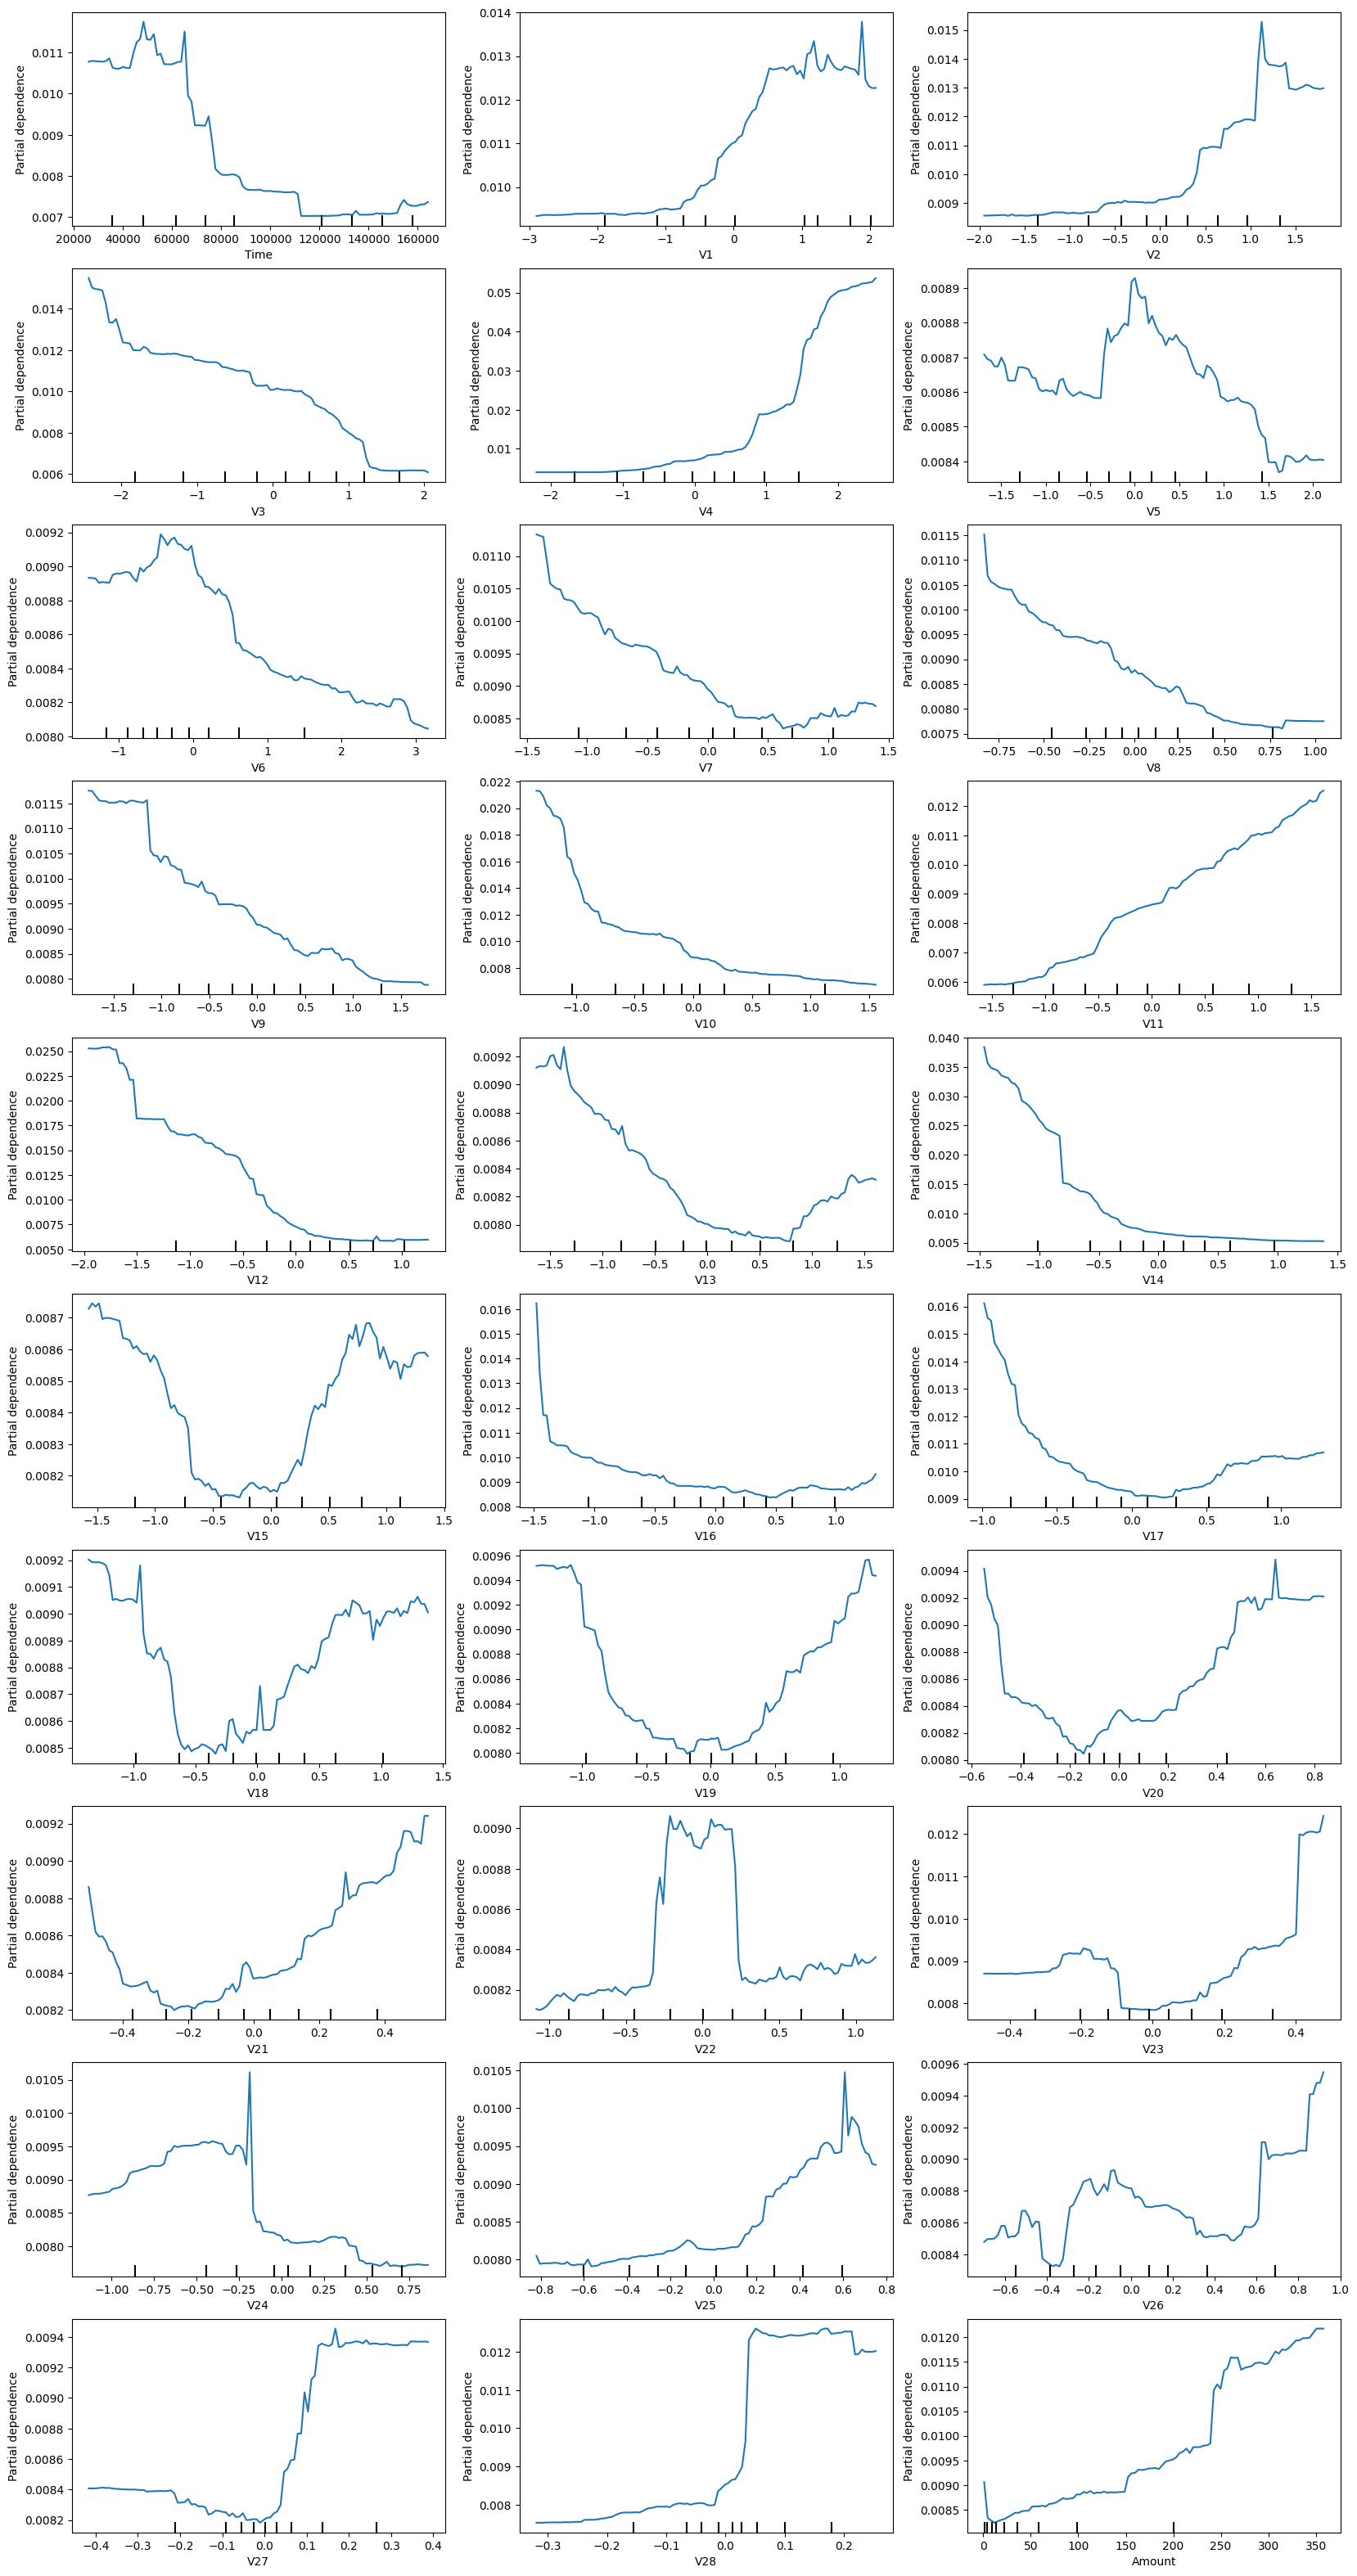

In [ ]:
fig,axes = plt.subplots(10,3,figsize = (20,40))
axes = axes.flatten()
cols = X_test.columns
for ax,col in zip(axes,cols):
  PartialDependenceDisplay.from_estimator(gscv_RFC, X_test, [col],ax=ax)